# LSTM for Regression with Time Steps

Time steps provide another way to phrase our time series problem. Like the window example, we can take prior time steps in our time series as inputs to predict the output at the next time step.

Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

We can do this using the same data representation as in the previous window-based example, except when we reshape the data, we set the columns to be the time steps dimension and change the features dimension back to 1.

Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

#### Import packages

In [2]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Fix random seed for reproducibility

In [3]:
numpy.random.seed(7)

#### Load the dataset

In [4]:
dataframe = read_csv('AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

#### Normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### Split the ordered dataset into train and test datasets

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#### Convert an array of values into a dataset matrix

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

#### Reshape into X=t and Y=t+1

In [9]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Reshape input to be [samples, features, time steps]
when we reshape the data, we set the columns to be the time steps dimension and change the features dimension back to 1.

In [10]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

#### Create and fit the LSTM network

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - loss: 0.0526
Epoch 2/100
92/92 - 0s - loss: 0.0221
Epoch 3/100
92/92 - 0s - loss: 0.0179
Epoch 4/100
92/92 - 0s - loss: 0.0164
Epoch 5/100
92/92 - 0s - loss: 0.0150
Epoch 6/100
92/92 - 0s - loss: 0.0135
Epoch 7/100
92/92 - 0s - loss: 0.0121
Epoch 8/100
92/92 - 0s - loss: 0.0109
Epoch 9/100
92/92 - 0s - loss: 0.0097
Epoch 10/100
92/92 - 0s - loss: 0.0083
Epoch 11/100
92/92 - 0s - loss: 0.0076
Epoch 12/100
92/92 - 0s - loss: 0.0064
Epoch 13/100
92/92 - 0s - loss: 0.0060
Epoch 14/100
92/92 - 0s - loss: 0.0053
Epoch 15/100
92/92 - 0s - loss: 0.0051
Epoch 16/100
92/92 - 0s - loss: 0.0048
Epoch 17/100
92/92 - 0s - loss: 0.0045
Epoch 18/100
92/92 - 0s - loss: 0.0043
Epoch 19/100
92/92 - 0s - loss: 0.0043
Epoch 20/100
92/92 - 0s - loss: 0.0041
Epoch 21/100
92/92 - 0s - loss: 0.0042
Epoch 22/100
92/92 - 0s - loss: 0.0042
Epoch 23/100
92/92 - 0s - loss: 0.0043
Epoch 24/100
92/92 - 0s - loss: 0.0043
Epoch 25/100
92/92 - 0s - loss: 0.0041
Epoch 26/100
92/92 - 0s - loss: 0.

#### Performance of Model

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.29 RMSE
Test Score: 49.05 RMSE


#### Plot baseline and predictions

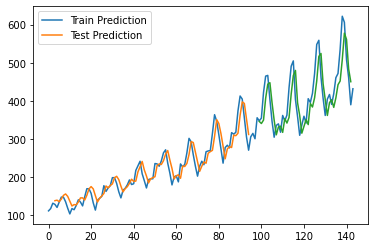

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Train Prediction', 'Test Prediction'])
plt.show()